# **Using pandas read_html to Web Scrape Data for Data Science**

Chanin Nantasenamat

<i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to easily web scrape data using pandas read_html() function for your data science project. We will be web scraping NBA player stats data and perform a quick data exploration.

## **URL to the webpage "NFL Stats"**

### Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [ ]:
# The Building Blocks
year = '2019'
url_link = 'https://www.pro-football-reference.com/years/2018/index.htm'
# Combining the URL + year strings together
url = url_link.format(year)
url

Now, let's programmatically return a list of URL given a list of years (e.g. 2015,2016,2017,2018,2019).

In [9]:
years = [2015,2016,2017,2018,2019]
url_link = 'https://www.pro-football-reference.com/years/{}/index.htm'
for year in years:
  url = url_link.format(year)
  print(url)

https://www.pro-football-reference.com/years/2015/index.htm
https://www.pro-football-reference.com/years/2016/index.htm
https://www.pro-football-reference.com/years/2017/index.htm
https://www.pro-football-reference.com/years/2018/index.htm
https://www.pro-football-reference.com/years/2019/index.htm


Method 2

In [ ]:
url = 'https://www.pro-football-reference.com/years/2018/index.htm'

## **Read HTML webpage into pandas**

In [2]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [56]:
df = pd.read_html(url, header = 0)
df

[                       Tm          W          L          T       W-L%  \
 0                AFC East   AFC East   AFC East   AFC East   AFC East   
 1   New England Patriots*         12          4          0       .750   
 2          Buffalo Bills+         10          6          0       .625   
 3           New York Jets          7          9          0       .438   
 4          Miami Dolphins          5         11          0       .313   
 5               AFC North  AFC North  AFC North  AFC North  AFC North   
 6       Baltimore Ravens*         14          2          0       .875   
 7     Pittsburgh Steelers          8          8          0       .500   
 8        Cleveland Browns          6         10          0       .375   
 9      Cincinnati Bengals          2         14          0       .125   
 10              AFC South  AFC South  AFC South  AFC South  AFC South   
 11        Houston Texans*         10          6          0       .625   
 12      Tennessee Titans+          9 

### How many tables are there in the webpage?

In [18]:
len(df)

2

### Select the first table

In [58]:
df[0]

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East,AFC East
1,New England Patriots*,12,4,0,.750,420,225,195,12.2,-1.8,10.4,2.8,7.6
2,Buffalo Bills+,10,6,0,.625,314,259,55,3.4,-1.3,2.2,-3.5,5.7
3,New York Jets,7,9,0,.438,276,359,-83,-5.2,-1.1,-6.3,-5.7,-0.6
4,Miami Dolphins,5,11,0,.313,306,494,-188,-11.8,0.2,-11.6,-2.4,-9.1
5,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North,AFC North
6,Baltimore Ravens*,14,2,0,.875,531,282,249,15.6,0.1,15.6,11.0,4.7
7,Pittsburgh Steelers,8,8,0,.500,289,303,-14,-0.9,1.2,0.3,-4.3,4.6
8,Cleveland Browns,6,10,0,.375,335,393,-58,-3.6,1.7,-1.9,-0.4,-1.5
9,Cincinnati Bengals,2,14,0,.125,279,420,-141,-8.8,1.5,-7.3,-4.4,-2.9


In [57]:
df2019 = df[0]

## Data cleaning

We can see that the table header is presented multiple times in several rows.

In [59]:
len(df2019[df2019.Tm == 'Tm'])

0

In [60]:
df2019[df2019.Tm == 'Tm']

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS


In [68]:
df = df2019.drop(df2019[df2019.Tm == 'Tm'].index)
df= df2019[pd.to_numeric(df['DSRS'], errors='coerce').notnull()]

In [64]:
df2019.shape

(20, 13)

In [65]:
df.shape

(20, 13)

## Quick Exploratory Data Analysis

In [34]:
import seaborn as sns

Making the histogram

<ipython-input-72-a17be1c73da9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.W,


<Axes: xlabel='W'>

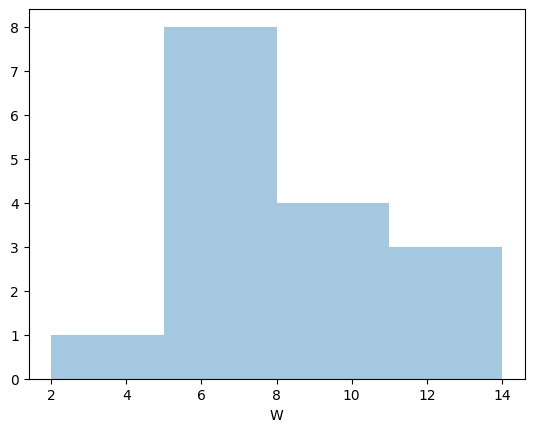

In [72]:
sns.distplot(df.W,
             kde=False)

Change bar line color

<ipython-input-73-796155827df7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.W,


<Axes: xlabel='W'>

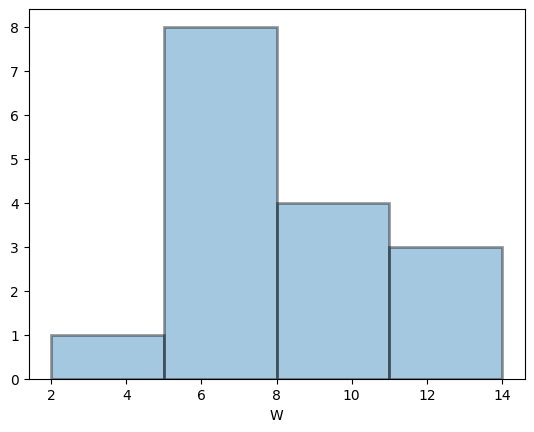

In [73]:
sns.distplot(df.W,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2))

Change bar fill colors

<ipython-input-75-3b251620b021>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.W,


<Axes: xlabel='W'>

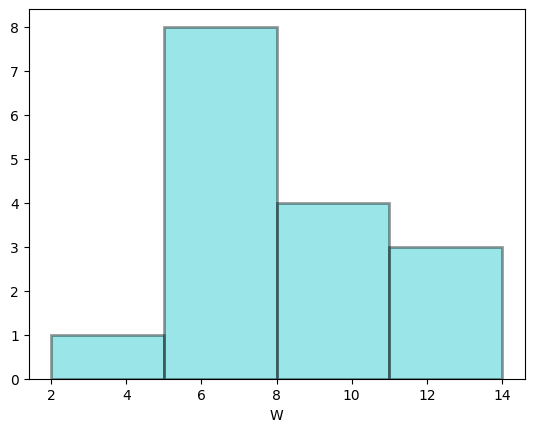

In [75]:
sns.distplot(df.W,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')